In [1]:
import glob
import cv2 
import math

from scipy.linalg import svd
from numpy import linalg as LA

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

In [2]:
%matplotlib inline

In [8]:
# path = glob.glob("E:/Program Files/Detected/*.png")
path = glob.glob("E:/face_dectection/emotion/*/*.jpg") 

In [9]:
print(len(path))

2016


In [12]:
X=[]
for img in path:
    try:
        n = cv2.imread(img)
        gray = cv2.cvtColor(n,cv2.COLOR_BGR2GRAY)
        gray = cv2.resize(gray,(50,50))
    except:
        print(img+"is not done!")
        continue
    X.append(gray)
print(len(X))

E:/face_dectection/emotion\anger\recgonize_anger268.jpgis not done!
E:/face_dectection/emotion\anger\recgonize_anger302.jpgis not done!
E:/face_dectection/emotion\anger\recgonize_anger322.jpgis not done!
E:/face_dectection/emotion\anger\recgonize_anger358.jpgis not done!
E:/face_dectection/emotion\anger\recgonize_anger374.jpgis not done!
E:/face_dectection/emotion\anger\recgonize_anger392.jpgis not done!
E:/face_dectection/emotion\anger\recgonize_anger7.jpgis not done!
E:/face_dectection/emotion\fear\recgonize_fear104.jpgis not done!
E:/face_dectection/emotion\fear\recgonize_fear105.jpgis not done!
E:/face_dectection/emotion\fear\recgonize_fear11.jpgis not done!
E:/face_dectection/emotion\fear\recgonize_fear120.jpgis not done!
E:/face_dectection/emotion\fear\recgonize_fear13.jpgis not done!
E:/face_dectection/emotion\fear\recgonize_fear140.jpgis not done!
E:/face_dectection/emotion\fear\recgonize_fear141.jpgis not done!
E:/face_dectection/emotion\fear\recgonize_fear156.jpgis not done!


E:/face_dectection/emotion\sad\recgonize_sad35.jpgis not done!
E:/face_dectection/emotion\sad\recgonize_sad352.jpgis not done!
E:/face_dectection/emotion\sad\recgonize_sad361.jpgis not done!
E:/face_dectection/emotion\sad\recgonize_sad365.jpgis not done!
E:/face_dectection/emotion\sad\recgonize_sad366.jpgis not done!
E:/face_dectection/emotion\sad\recgonize_sad38.jpgis not done!
E:/face_dectection/emotion\sad\recgonize_sad381.jpgis not done!
E:/face_dectection/emotion\sad\recgonize_sad397.jpgis not done!
E:/face_dectection/emotion\sad\recgonize_sad40.jpgis not done!
E:/face_dectection/emotion\sad\recgonize_sad400.jpgis not done!
E:/face_dectection/emotion\sad\recgonize_sad401.jpgis not done!
E:/face_dectection/emotion\sad\recgonize_sad56.jpgis not done!
E:/face_dectection/emotion\sad\recgonize_sad6.jpgis not done!
E:/face_dectection/emotion\sad\recgonize_sad60.jpgis not done!
E:/face_dectection/emotion\sad\recgonize_sad72.jpgis not done!
E:/face_dectection/emotion\sad\recgonize_sad74.j

In [13]:
# Convert List dataset into array
print(len(X))
X= np.array(X)

1847


In [7]:
#data = pd.read_csv('F:/Program Files/Annotations/Train_Expression.txt', sep=" ", header=None)
#data.columns = ["filename", "expression"]

In [15]:
n = cv2.imread("E:/face_dectection/emotion/surprise/recgonize_surprise299.jpg")
print(n)

None


In [17]:
Y = np.zeros((len(X)))
i = 0
for img in path:
    if cv2.imread(img) is None:
        continue
    elif "happy" in img: 
        #print(row["filename"])
        Y[i]  = 0
    elif "anger" in img:
        Y[i]  = 1 
    elif "fear" in img:
        Y[i]  = 2 
    elif "sad" in img:
        Y[i]=3 
    elif "surprise" in img:
        Y[i] = 4 
    i = i+1

In [18]:
print(len(Y))
Y

1847


array([1., 1., 1., ..., 4., 4., 4.])

In [19]:
Y_one_hot = to_categorical(Y)

In [20]:
Y_one_hot,Y

(array([[0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        ...,
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.]], dtype=float32),
 array([1., 1., 1., ..., 4., 4., 4.]))

In [21]:
X = X.astype('float32')
X = X / 255

X = X.reshape(-1,50,50, 1)

In [22]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_Y,test_Y = train_test_split(X, Y_one_hot, test_size=0.1, random_state=13)
train_X.shape,test_X.shape,train_Y.shape,test_Y.shape

((1662, 50, 50, 1), (185, 50, 50, 1), (1662, 5), (185, 5))

In [23]:
train_X,valid_X,train_Y,valid_Y = train_test_split(train_X, train_Y, test_size=0.2, random_state=13)
train_X.shape,valid_X.shape,train_Y.shape,valid_Y.shape

((1329, 50, 50, 1), (333, 50, 50, 1), (1329, 5), (333, 5))

In [27]:
import keras
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import LeakyReLU

In [33]:
batch_size = 128
epochs = 30
num_classes = 5

In [34]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='valid',input_shape=(50,50,1)))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2),padding='valid'))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='linear',padding='valid'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),padding='valid'))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='linear',padding='valid'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(MaxPooling2D(pool_size=(2, 2),padding='valid'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))           
model.add(Dropout(0.3))
model.add(Dense(64, activation='linear'))
model.add(LeakyReLU(alpha=0.1))           
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))


In [36]:
#compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 48, 48, 32)        320       
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 48, 48, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 24, 24, 32)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 24, 24, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 22, 22, 64)        18496     
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 22, 22, 64)        0         
                                                      

In [38]:
model_train = model.fit(train_X, train_Y, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_Y))

Epoch 1/30
11/11 [==============================] - 3s 162ms/step - loss: 1.6209 - accuracy: 0.2047 - val_loss: 1.6109 - val_accuracy: 0.1952
Epoch 2/30
11/11 [==============================] - 2s 150ms/step - loss: 1.6119 - accuracy: 0.2205 - val_loss: 1.6090 - val_accuracy: 0.1982
Epoch 3/30
11/11 [==============================] - 2s 147ms/step - loss: 1.6080 - accuracy: 0.2054 - val_loss: 1.6089 - val_accuracy: 0.2102
Epoch 4/30
11/11 [==============================] - 2s 149ms/step - loss: 1.6045 - accuracy: 0.2114 - val_loss: 1.6074 - val_accuracy: 0.2312
Epoch 5/30
11/11 [==============================] - 2s 148ms/step - loss: 1.6033 - accuracy: 0.2144 - val_loss: 1.6046 - val_accuracy: 0.2913
Epoch 6/30
11/11 [==============================] - 2s 148ms/step - loss: 1.5969 - accuracy: 0.2355 - val_loss: 1.5886 - val_accuracy: 0.2733
Epoch 7/30
11/11 [==============================] - 2s 152ms/step - loss: 1.5875 - accuracy: 0.2400 - val_loss: 1.5780 - val_accuracy: 0.2432
Epoch 

In [39]:
model.save("CNN_model.h5")

In [40]:
test_eval = model.evaluate(test_X, test_Y, verbose=1)

6/6 [==============================] - 0s 15ms/step - loss: 1.3517 - accuracy: 0.4649


In [41]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 1.3517487049102783
Test accuracy: 0.4648648500442505


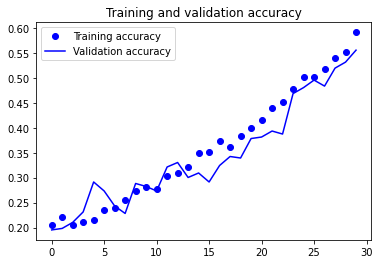

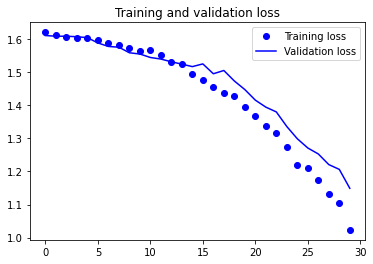

In [43]:
accuracy = model_train.history['accuracy']
val_accuracy = model_train.history['val_accuracy']
loss = model_train.history['loss']
val_loss = model_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [44]:
predicted_classes = model.predict(test_X)

6/6 [==============================] - 0s 13ms/step


In [45]:
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)

In [46]:
test_Y = np.argmax(np.round(test_Y),axis=1)

In [47]:
predicted_classes.shape, test_Y.shape

((185,), (185,))

Found 68 correct labels


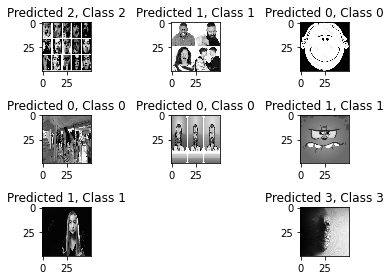

In [48]:
correct = np.where(predicted_classes==test_Y)[0]
print ("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(50,50), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], test_Y[correct]))
    plt.tight_layout()

Found 117 incorrect labels


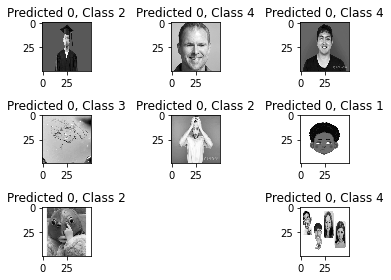

In [49]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print ("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(50,50), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], test_Y[incorrect]))
    plt.tight_layout()

In [50]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))
 

              precision    recall  f1-score   support

     Class 0       0.26      0.85      0.40        39
     Class 1       0.55      0.28      0.37        40
     Class 2       0.53      0.26      0.35        38
     Class 3       0.79      0.24      0.37        46
     Class 4       0.43      0.14      0.21        22

    accuracy                           0.37       185
   macro avg       0.51      0.35      0.34       185
weighted avg       0.53      0.37      0.35       185

